In [18]:
import data_utils
import pandas as pd
dataset = data_utils.get_pqrd_dataset()

display(dataset.head())
dataset.shape


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM,year
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i,2017
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i,2017
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i,2017


(2375371, 47)

In [19]:
'''
dataset = dataset[dataset['RIESGO_VIDA'] != '0']
dataset = dataset[(dataset['AFEC_GENERO'] != 0) & (dataset['AFEC_GENERO'] != '0')]
dataset = dataset[(dataset['CIE_10'] != 0) & (dataset['CIE_10'] != '0')]
dataset['RIESGO_VIDA'] = dataset['RIESGO_VIDA'].apply(lambda value: 1 if value == 'si' else 0)
dataset.shape
'''

"\ndataset = dataset[dataset['RIESGO_VIDA'] != '0']\ndataset = dataset[(dataset['AFEC_GENERO'] != 0) & (dataset['AFEC_GENERO'] != '0')]\ndataset = dataset[(dataset['CIE_10'] != 0) & (dataset['CIE_10'] != '0')]\ndataset['RIESGO_VIDA'] = dataset['RIESGO_VIDA'].apply(lambda value: 1 if value == 'si' else 0)\ndataset.shape\n"

## Is there any part of the population more susceptible to have access to the health care system?

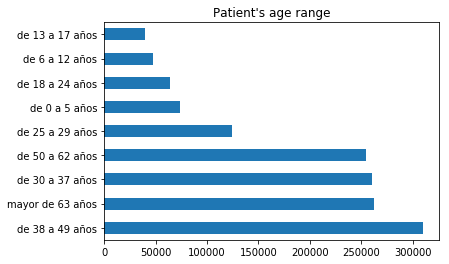

In [26]:
afec_edadr = dataset[dataset['AFEC_EDADR'] != '0']['AFEC_EDADR'].value_counts().nlargest(n=10, keep='first')
afec_edadr.plot(kind='barh', title='Patient\'s age range');

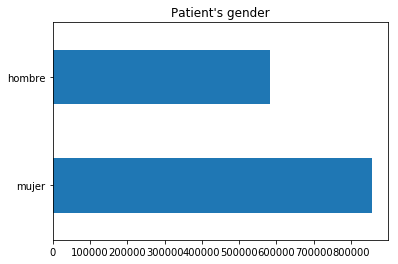

In [27]:
afec_genero = dataset[dataset['AFEC_GENERO'] != '0']['AFEC_GENERO'].value_counts().nlargest(n=10, keep='first')
afec_genero.plot(kind='barh', title='Patient\'s gender');

## Top 10 of reasons to raise a pqrd.


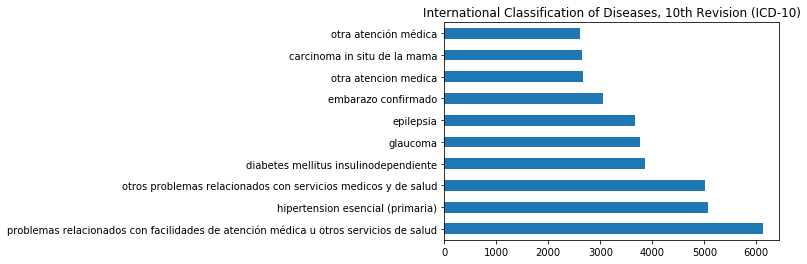

In [33]:
cie_10 = dataset[dataset['CIE_10'] != '0']['CIE_10'].value_counts().nlargest(n=10, keep='first')
cie_10.plot(kind='barh', title='International Classification of Diseases, 10th Revision (ICD-10)');

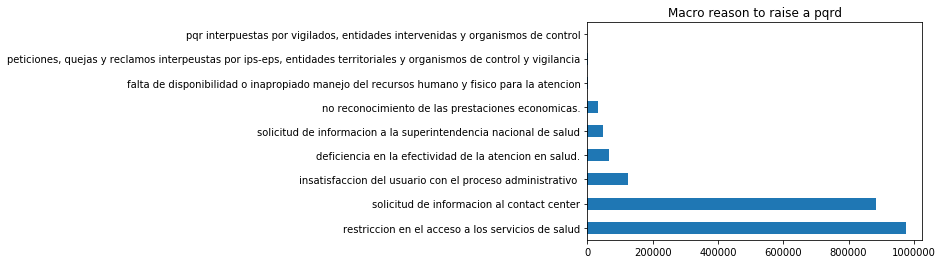

In [32]:
macromotivo = dataset[dataset['MACROMOTIVO'] != '0']['MACROMOTIVO'].value_counts().nlargest(n=10, keep='first')
macromotivo.plot(kind='barh', title='Macro reason to raise a pqrd');

## Top 10 of reasons to raise a pqrd when patient's life is at risk


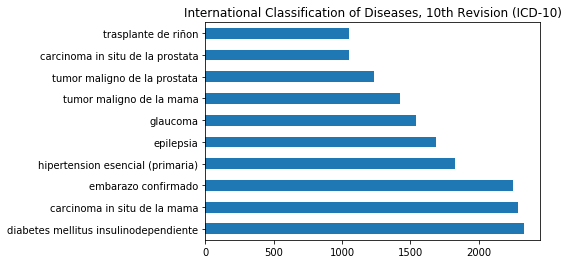

In [39]:
cie_10 = dataset[(dataset['CIE_10'] != '0') & (dataset['RIESGO_VIDA'] == 'si')]['CIE_10'].value_counts().nlargest(n=10, keep='first')
cie_10.plot(kind='barh', title='International Classification of Diseases, 10th Revision (ICD-10)');

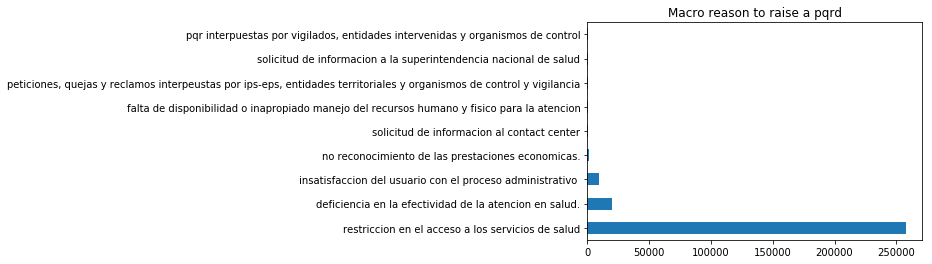

In [65]:
macromotivo = dataset[(dataset['MACROMOTIVO'] != '0') & (dataset['RIESGO_VIDA'] == 'si')]['MACROMOTIVO'].value_counts().nlargest(n=10, keep='first')
macromotivo.plot(kind='barh', title='Macro reason to raise a pqrd');

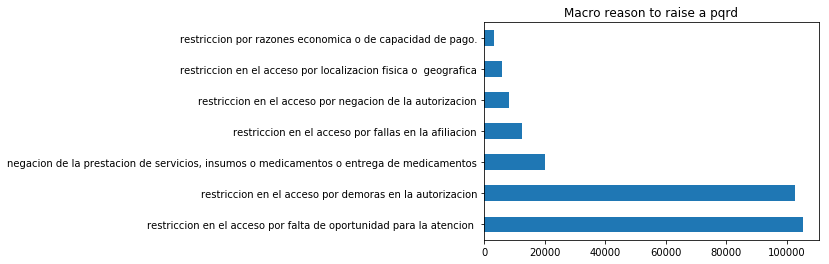

In [74]:
macromotivo = dataset[(dataset['MACROMOTIVO'].str.contains('restriccion en el acceso a los servicios de salud')) & (dataset['RIESGO_VIDA'] == 'si')]['MOTIVO_GENERAL'].value_counts().nlargest(n=10, keep='first')
macromotivo.plot(kind='barh', title='Macro reason to raise a pqrd');

In [47]:
dataset[(dataset['MACROMOTIVO'] != '0') & (dataset['RIESGO_VIDA'] == 'si')]['COD_MACROMOT'].value_counts().nlargest(n=10, keep='first')

1     258114
2      19508
4       9431
5        934
8        271
3        257
10       204
9         92
Name: COD_MACROMOT, dtype: int64

In [59]:
dataset.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'ALTO_COSTO', 'CIE_10',
       'COD_MACROMOT', 'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC',
       'ENT_COD_DEPTO', 'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_DPTO', 'ENT_MPIO',
       'ENT_MPIO_DANE', 'ENT_NOMBRE', 'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS',
       'IDPATOLOGIA_2', 'IDRANGOEDADES', 'ID_MES', 'MACROMOTIVO', 'MES',
       'MOTIVO_ESPECIFICO', 'MOTIVO_GENERAL', 'PATOLOGIA_1', 'PATOLOGIA_TIPO',
       'PET_COD_DEPTO', 'PET_DPTO', 'PET_MPIO', 'PET_TIPOPER', 'PQR_CANAL',
       'PQR_CLASE_SNS', 'PQR_ESTADO', 'PQR_GRUPOALERTA', 'PQR_TIPOATENCION',
       'PQR_TIPOPETICION', 'RIESGO_VIDA', 'TRIM', 'year'],
      dtype='object')

In [72]:
#print(dataset[dataset['RIESGO_VIDA'] == 'si'].shape)
#print(dataset[(dataset['MACROMOTIVO'].str.contains('restriccion en el acceso a los servicios de salud')) & (dataset['RIESGO_VIDA'] == 'si')].shape)
dataset[
        (dataset['MACROMOTIVO'].str.contains('restriccion en el acceso a los servicios de salud')) & 
        (
            (dataset['MOTIVO_GENERAL'].str.contains('restriccion en el acceso por falta de oportunidad para la atencion')) |
            (dataset['MOTIVO_GENERAL'].str.contains('restriccion en el acceso por demoras en la autorizacion'))
        )& 
    (dataset['RIESGO_VIDA'] == 'si'
    )][['COD_MACROMOT', 'COD_MOTGEN', 'COD_MOTESP', 'MACROMOTIVO', 'MOTIVO_GENERAL', 'MOTIVO_ESPECIFICO']].head()

,COD_MACROMOT,COD_MOTGEN,COD_MOTESP,MACROMOTIVO,MOTIVO_GENERAL,MOTIVO_ESPECIFICO
4,1,101,10119,restriccion en el acceso a los servicios de salud,restriccion en el acceso por falta de oportuni...,falta de oportunidad en la entrega de medicame...
9,1,103,10317,restriccion en el acceso a los servicios de salud,restriccion en el acceso por demoras en la aut...,demora de la autorizacion de atenciones domici...
31,1,103,10322,restriccion en el acceso a los servicios de salud,restriccion en el acceso por demoras en la aut...,demora de la autorizacion de elementos para te...
32,1,101,10119,restriccion en el acceso a los servicios de salud,restriccion en el acceso por falta de oportuni...,falta de oportunidad en la entrega de medicame...
33,1,101,10119,restriccion en el acceso a los servicios de salud,restriccion en el acceso por falta de oportuni...,falta de oportunidad en la entrega de medicame...


## Top 10 of reasons to raise a pqrd when patient's life is not at risk


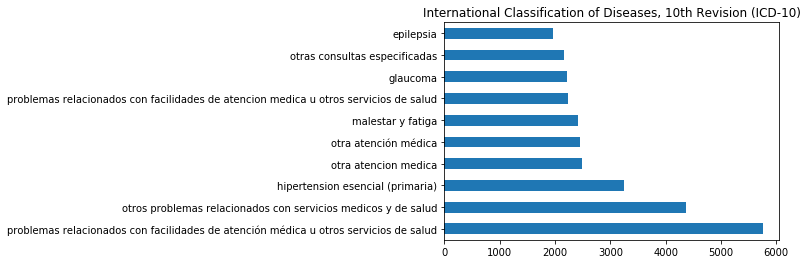

In [41]:
cie_10 = dataset[(dataset['CIE_10'] != '0') & (dataset['RIESGO_VIDA'] == 'no')]['CIE_10'].value_counts().nlargest(n=10, keep='first')
cie_10.plot(kind='barh', title='International Classification of Diseases, 10th Revision (ICD-10)');

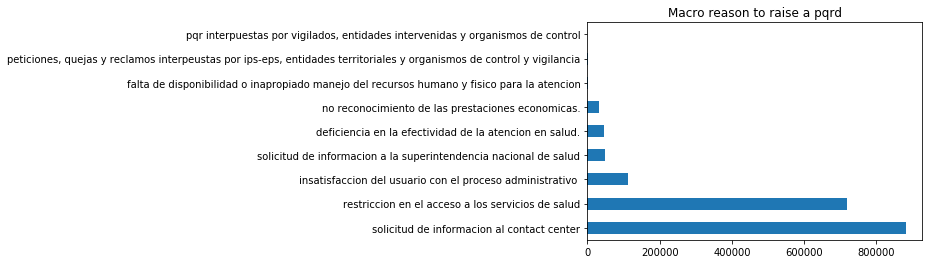

In [42]:
macromotivo = dataset[(dataset['MACROMOTIVO'] != '0') & (dataset['RIESGO_VIDA'] == 'no')]['MACROMOTIVO'].value_counts().nlargest(n=10, keep='first')
macromotivo.plot(kind='barh', title='Macro reason to raise a pqrd');

## Use of internet for raising pqrds over the time.

C:\Users\mrugeles\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


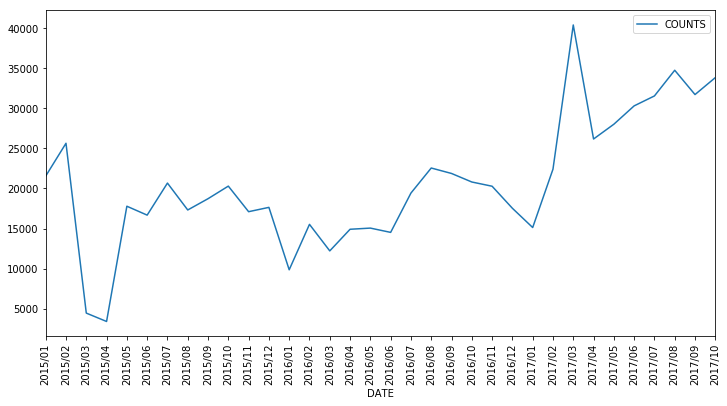

In [25]:
canales_df = dataset.loc[(dataset['PQR_CANAL'] == "chat") | (dataset['PQR_CANAL'] == "correo") | (dataset['PQR_CANAL'] == "web")]

canales_df['DATE'] = canales_df['year'].astype(str) + '/' + canales_df['MES'].astype(str)

canales_counts = canales_df['DATE'].value_counts().sort_index()
canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

canales_counts.plot(kind='line',x='DATE',y='COUNTS', xticks=canales_counts.index, figsize=(12,6), rot=90)


